In [228]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpld3

In [229]:
import json
data_prefix = "../out."
time = np.load(data_prefix + "time.npy")
target = np.load(data_prefix + "target.npy")
inputs = np.load(data_prefix + "input.npy")
output = np.load(data_prefix + "output.npy")
weight = np.load(data_prefix + "weight.npy")
cwnd = np.load(data_prefix + "cwnd.npy")
search_regcoef = np.load(data_prefix + "search_regcoef.npy")
search_mse = np.load(data_prefix + "search_mse.npy")
#cwnd_peak = np.load(data_prefix + "cwnd_peak.npy")
settings = json.load(open(data_prefix + "settings.json"))
settings

{'N': 128,
 'duration': 910,
 'esn_dt': 0.1,
 'init_time': 10.0,
 'input_num': 1,
 'k': 6.0,
 'link_bps': '10Mb',
 'link_delay': '10ms',
 'link_queue': '10',
 'mse': 0.26827883195770336,
 'reg_coef': 9.0,
 'training_time': 810.0}

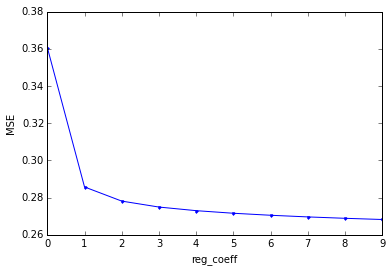

In [230]:
plt.plot(search_regcoef, search_mse, '.-')
plt.xlabel('reg_coeff')
plt.ylabel('MSE')
plt.show()

In [231]:
"""
weight_matrix = np.zeros((settings['N'],settings['N']))
for i, w in enumerate(weight):
    src = int(i / (settings['N']-1))
    dst = int(i % (settings['N']-1))
    if src<=dst:
        dst +=1
    weight_matrix[src][dst] = np.abs(w)

plt.figure(figsize=(10, 10))
plt.matshow(weight_matrix,cmap=plt.cm.gray)
plt.colorbar()
plt.show()
"""

"\nweight_matrix = np.zeros((settings['N'],settings['N']))\nfor i, w in enumerate(weight):\n    src = int(i / (settings['N']-1))\n    dst = int(i % (settings['N']-1))\n    if src<=dst:\n        dst +=1\n    weight_matrix[src][dst] = np.abs(w)\n\nplt.figure(figsize=(10, 10))\nplt.matshow(weight_matrix,cmap=plt.cm.gray)\nplt.colorbar()\nplt.show()\n"

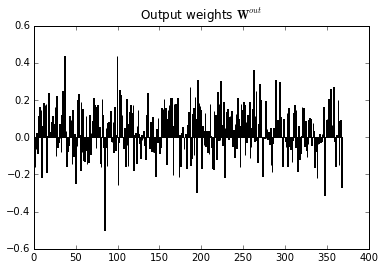

In [232]:
plt.figure(figsize = (9, 6))

plt.figure(0).clear()
plt.bar(range(weight.shape[0]), weight)
plt.title('Output weights $\mathbf{W}^{out}$')

#mpld3.display()
plt.show()

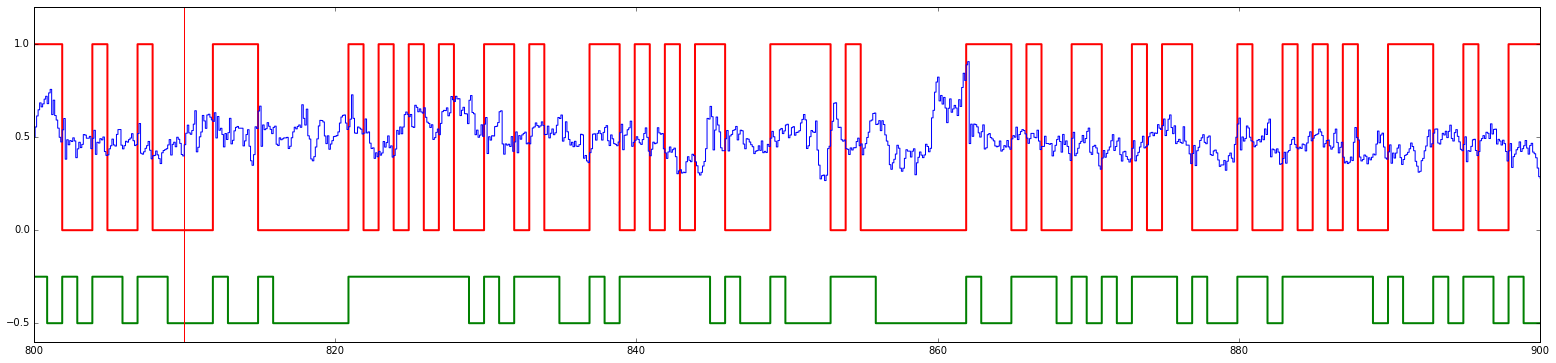

In [235]:
plt.figure(figsize=(27, 6))


plt.step(time, target, 'r', linewidth=2)

for i, input_data in enumerate(inputs):
    shift_input_data = input_data / 4. - 0.5 - 0.3*i
    #plt.plot(time, shift_input_data, 'g', linewidth=2)
    plt.step(time, shift_input_data, 'g', linewidth=2)
    
plt.axvline(x=settings["init_time"], color='red')
plt.axvline(x=settings["training_time"], color='red')

#plt.plot(time, output, 'b')
plt.step(time, output, 'b')



# combolution
# filter = np.ones(100)/100.0
# C = np.convolve(Y[0, :], filter, 'valid')
# plt.plot(dt * np.arange(C.shape[0]), C, 'b', linewidth=2)

#mpld3.display()
plt.xlim(800, 900)
plt.show()

In [218]:
def extract_cwnd(filename, N):
    data = np.loadtxt( filename, usecols=(1,3,7,17) ) #(time, src, dst, cwnd)
    cwnd = [[np.empty((0,2)) for i in range(N)] for j in range(N)]
    for d in data:
        src = int(d[1])
        dst = int(d[2])
        if src == dst or not(0<=src<N) or not(0<=dst<N):
            continue
        cwnd[src][dst] = np.vstack((cwnd[src][dst], (d[0], d[3])))
    return cwnd
"""
def plot_all_cwnd(cwnd_data):
    N = len(cwnd_data)
    for src in range(N):
        plt.figure(figsize=(15, 2))
        for dst in range(N):
            if src == dst:
                continue
            target = cwnd_data[src][dst]
            plt.plot(target[:,0], target[:,1], label=("node[%d] -> node[%d]"%(src, dst)))
        plt.ylim(1,40)
        #plt.xlim(0,10)
        #plt.legend()
        plt.show()
"""
def plot_all_cwnd(cwnd_data):
    plt.figure(figsize=(15, 2))
    for d in cwnd_data:
        #plt.figure(figsize=(15, 2))
        plt.plot(time, d)
        plt.ylim(0.,1.)
        #plt.xlim(300,400)
        #plt.legend()
    plt.show()

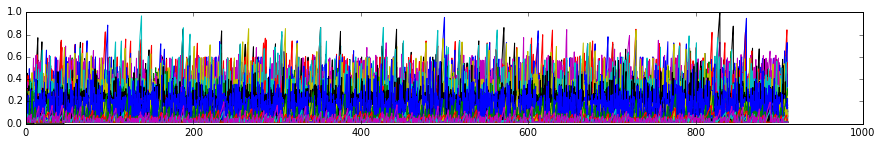

In [219]:
#cwnd = extract_cwnd(data_dir+"out.tcp", 10)
plot_all_cwnd(cwnd)
#plot_all_cwnd(cwnd_peak, settings["N"])

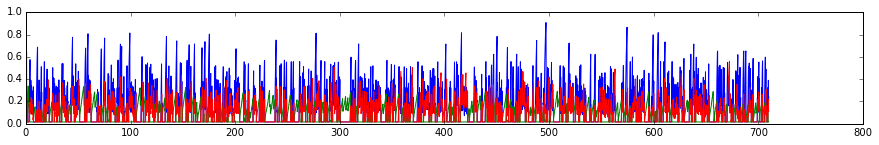

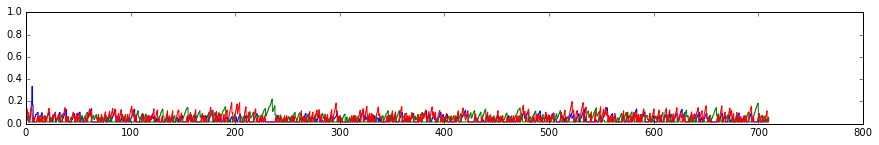

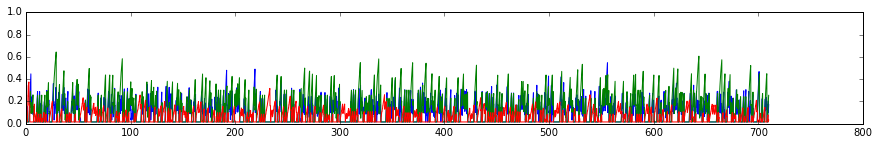

In [199]:
plot_all_cwnd(cwnd[0:3])
plot_all_cwnd(cwnd[-5:-2])
plot_all_cwnd(cwnd[100:103])
#plot_all_cwnd(cwnd_peak[0:1], settings["N"])

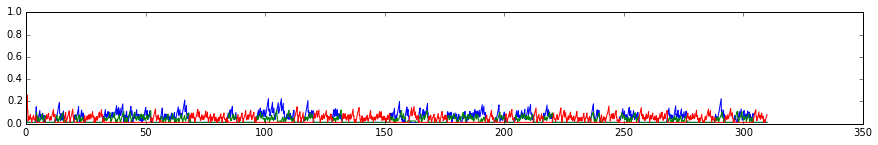

In [67]:
plot_all_cwnd(cwnd[-5:-2])